In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\AirPassengers.csv')
df = df.set_index(['Month'])  # As we have only two column to work with
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [6]:
df.info()
# there are 144 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


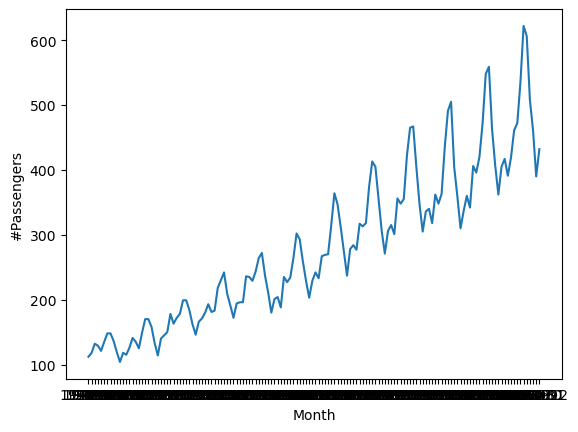

In [10]:
sns.lineplot(x='Month',y='#Passengers',data = df)
plt.show()

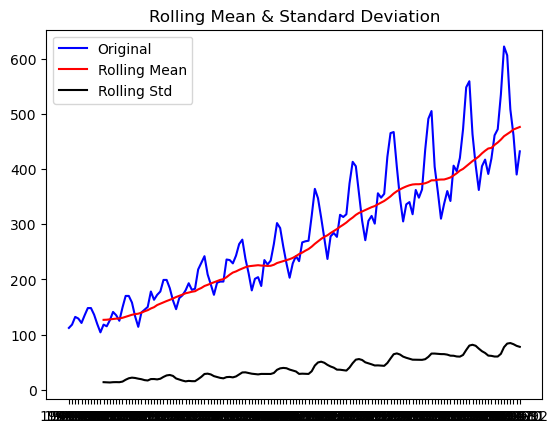

In [11]:
#Determining the Rooling statistics
rollmean = df.rolling(window = 12).mean()
rollstd = df.rolling(window = 12).std()

#plotting the graphs
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Here we can see that the mean is not constant its increasing .Ideally it should be constant 
# and the standard diveation should ideally be constant over the time period as it is in our case 
# so here we will try to make it more stationary

# Stationarize the data

In [13]:
#transforming the data 
#Differencing here we will take the difference between the successive values it may be 1or 2 or 3
ts_log = np.log(df['#Passengers'])

ts_log_mv = ts_log - ts_log.shift(2)
ts_log_mv.head()
#so here we can see that the first two rows are empty because we could not take the difference

Month
1949-01         NaN
1949-02         NaN
1949-03    0.164303
1949-04    0.089128
1949-05   -0.087011
Name: #Passengers, dtype: float64

In [14]:
#Removing the top null value
ts_log_mv.dropna(inplace = True)
ts_log_mv.head()
#so as we can see that there are no null values in our data

Month
1949-03    0.164303
1949-04    0.089128
1949-05   -0.087011
1949-06    0.045462
1949-07    0.201422
Name: #Passengers, dtype: float64

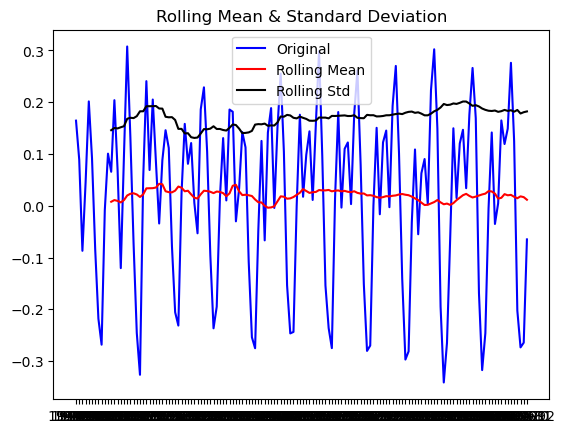

In [15]:
#onceing again seeing our data if its stationary or not
#Determining the Rooling statistics
rollmean = ts_log_mv.rolling(window = 12).mean()
rollstd = ts_log_mv.rolling(window = 12).std()

#plotting the graphs
orig = plt.plot(ts_log_mv, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# As we can see that Both the Rolling Mean and the Standard deveation both are constant through-out data

# Modeling

In [ ]:
# As we will be applying the ARIMA Model so we need to decide the p,q and d values 
# p-value will be decided by graph of ACf i.e(Auto-corelation fuction) which helps deciding
# the MA value (Moving Average)
# q-value will be decided by a graph of PACF (partial-Auto-corelation) which helps deciding the 
# AR (Auto-regressior)

C:\Users\Gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


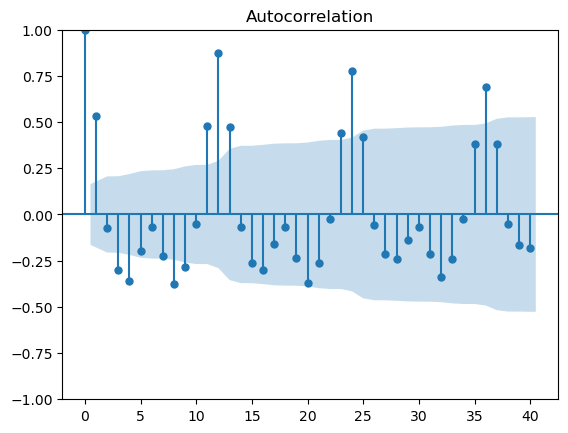

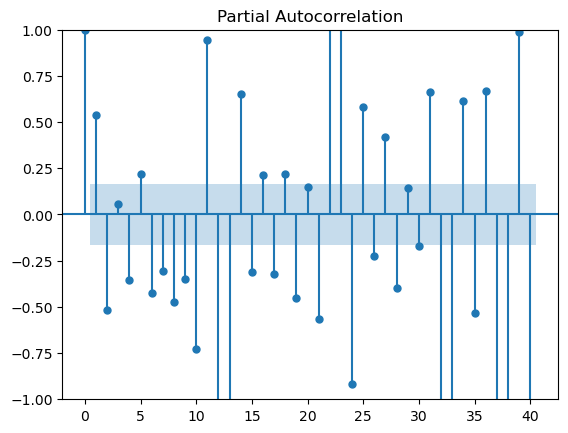

In [19]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig = sm.graphics.tsa.plot_acf(ts_log_mv,lags = 40)
fig = sm.graphics.tsa.plot_pacf(ts_log_mv,lags = 40)

In [ ]:
#p- value that we want to get from ACf value is 1
# q value that we want to et from pacf value is 1

C:\Users\Gaura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Gaura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Gaura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


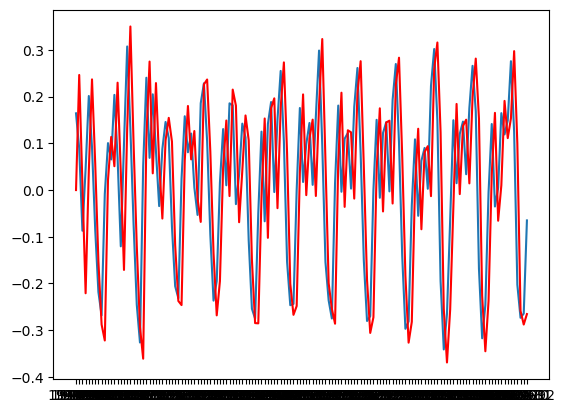

In [22]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_log_mv,order = (1,2,1))
result_arima = model.fit()
plt.plot(ts_log_mv)
plt.plot(result_arima.fittedvalues,color = 'red')
plt.show()